In [1]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

import numpy as np
import pandas as pd

#for tutorial of the BPTK library, go to 

#https://github.com/transentis/bptk_py_tutorial/blob/master/notebooks/step-by-step-guides/introduction_sd_sddsl.ipynb
#https://github.com/transentis/bptk_py_tutorial/blob/master/notebooks/sd-dsl/in-depth/in_depth_sd_dsl_functions/in_depth_sd_dsl_functions.ipynb


<h2>PP - MegaMem</h2>

MegaMem is a custom memory stick assembler located in Alberta, Canada. MegaMem's customers are always happy with their custom engraved memory sticks. Many companies use these memory sticks for marketing so that individuals can get personally branded items.

MegaMem orders fully assembled memory boards (Memory) from a producer in China and outer casing (Case) from a producer in Mexico. The Memory and Case are assembled into "PreFinished Goods" locally and stored in a "PreFinished Goods Warehouse". A custom engraving machine can quickly apply any custom logos for customers before they are shipped out.

Moving forward, MegaMem wants to map out the system dynamics of their supply chain in a system dynamics based model. The company has compiled the following information about their production process:

While MegaMem has many customers, they treat them all as a group called "Customers".

Orders (per week) from customers are normally distributed with a mean value of 600 and a standard deviation of 300.

Customer Orders cannot be negative and never exceed 5000 units per week.

Customers are not allowed to order more units than are currently in MegaMem's "PreFinished Goods Warehouse".

Assembly to replenish the "PreFinished Goods Warehouse" follows an SQ policy where S is 1000 and Q is 3000. 

Orders to replenish the inventory are placed at the beginning of the period(before the demand is received)

MegaMem currently has 2500 units in their "PreFinished Goods Warehouse".

Customer Orders determine the flow between the "PreFinished Goods Warehouse" and Customers. MegaMem calls this "Orders
Shipped". While engraving happens during this process, the company does not care about this inventory level

MegaMem does not want to add time delays to their model

<b>Part 1</b>

Create a system dynamics model for MegaMem.

Simulating over 100 weeks, which graph best represents your "Orders Shipped" through time?

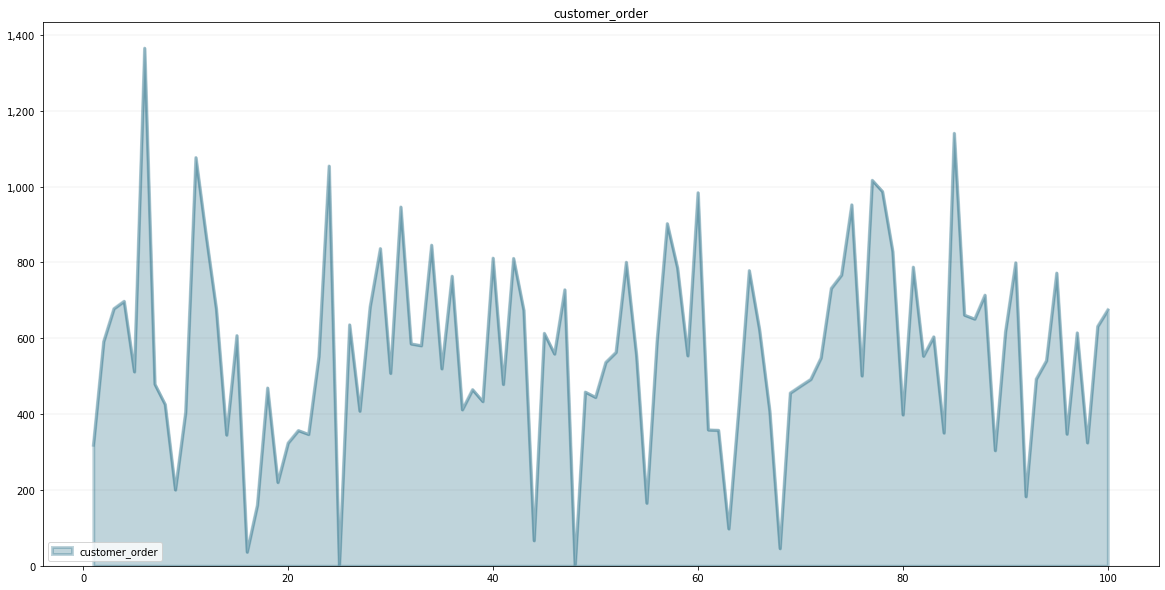

In [49]:
timeperiod = 100

model = Model(starttime=1,stoptime=timeperiod,dt=1,name='Inventory')

#STOCKS

#initial inventory of 2500
inventory = model.stock("Inventory")
inventory.initial_value = 2500.0

#FLOWS

#replenishment follows an (S,Q) policy where Q units are ordered if inventory is below S
replenishment = model.flow("replenishment")
S = 1000
Q = 3000
replenishment.equation = sd.If(inventory < S, Q, 0)

#customer_order is normally distributed with a mean of 600 and stdev of 300, cannot be higher than 5000, cannot be lower than 0
#and cannot be more than current inventory
customer_order = model.flow("customer_order")
mean = 600
stdev = 300
customer_order.equation = sd.min(inventory, sd.max(0, sd.min(5000, sd.normal(mean, stdev))))


inventory.equation = replenishment - customer_order

#Part1 Answer

customer_order.plot()


<b>Part 2</b>

Now, MegaMem is looking to find out what percentage of total sales are lost because customers are not allowed to order more units than are in inventory.

Hint: If you are using a Stock and Flow based simulation software, you should set up a different stock and flow diagram to capture lost sales. Also use an if then else statement in your lost sales calculation to make sure that there is a value in the fractional denominator

Using 1000 periods, about what percentage of demand is lost in the long run? (Enter the answer in decimal format for example 12% should be entered as 0.12)

Lost sales in 1000 time period:  0.05454033241846462


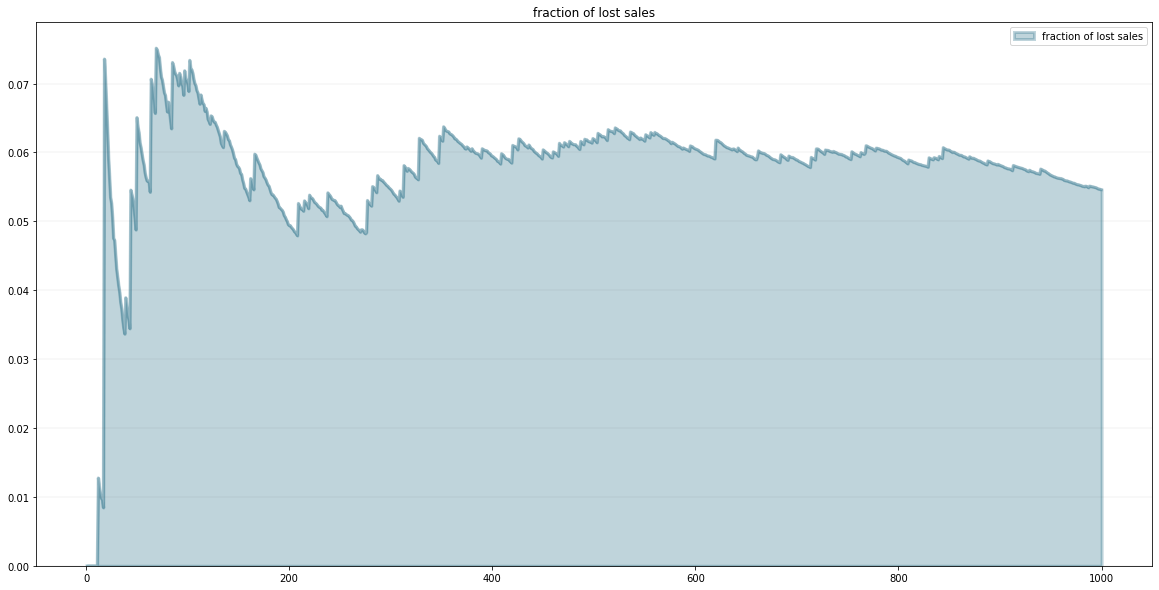

In [164]:
timeperiod = 1000

model = Model(starttime=1,stoptime=timeperiod,dt=1,name='Inventory')

#STOCKS

#initial inventory of 2500
inventory = model.stock("Inventory")
inventory.initial_value = 2500.0

#stock of lost sales 
lost_sales = model.stock('lost_sales')

#stock of demand
total_demand = model.stock('Total Demand')

#FLOWS

#replenishment follows an (S,Q) policy where Q units are ordered if inventory is below S
replenishment = model.flow("replenishment")
S = 1000
Q = 3000
replenishment.equation = sd.If(inventory < S, Q, 0)

#demand is normally distributed with a mean of 600 and stdev of 300, cannot be higher than 5000, cannot be lower than 0
#demand is allowed to be more than current inventory
demand = model.flow("demand")
mean = 600
stdev = 300
demand.equation = sd.max(0, sd.min(5000, sd.normal(mean, stdev)))

#customer_order can not be greater than inventory
customer_order = model.flow('customer_order')
customer_order.equation = sd.min(demand, inventory)

#lost_sale is the difference between demand and customer order
lost_sale = model.flow('lost_sale')
lost_sale.equation = demand - customer_order

inventory.equation = replenishment - customer_order


#total_demand is just the integration of demand in all time period
total_demand.equation = demand

#lost_sales is just the integration of lost_sale in all time period
lost_sales.equation = lost_sale

#track the fraction of lost sales to demand
lost_sale_fraction = model.converter('fraction of lost sales')
lost_sale_fraction.equation = sd.If(total_demand > 0, lost_sales / total_demand, 0)


#find the total % of lost sales
        
lost_sale_fraction.plot()

print('Lost sales in 1000 time period: ', lost_sale_fraction(timeperiod+1))

<b>Part 4</b>

Holding all else equal to the information in Part 1 of this problem, what is the minimum S value that would keep the percent of lost sales below 1%? Use 10,000 weeks for this calculation.
    

Steady State S Value,  1402.2999999999442


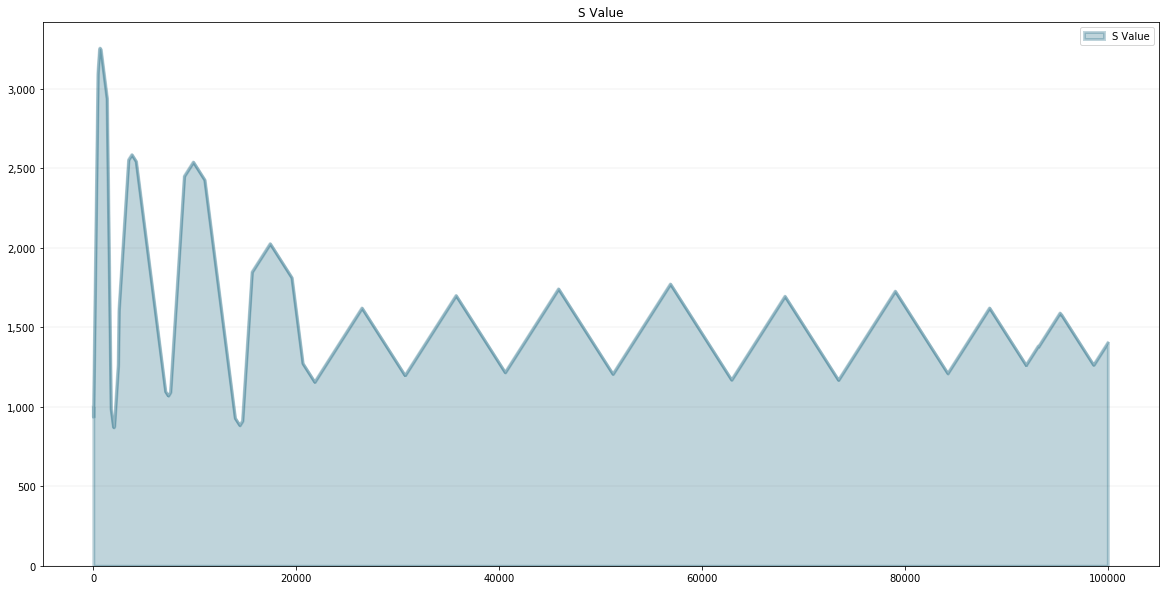

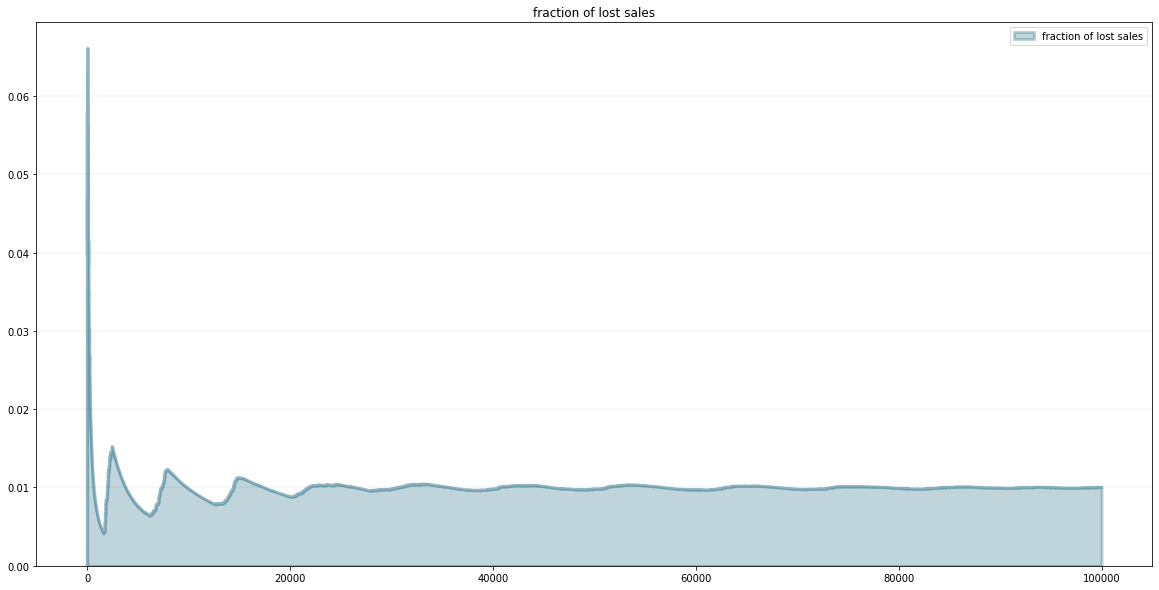

In [83]:
timeperiod = 100000

model = Model(starttime=1,stoptime=timeperiod,dt=1,name='Inventory')

#STOCKS

#initial inventory of 2500
inventory = model.stock("Inventory")
inventory.initial_value = 2500.0

#stock of lost sales 
lost_sales = model.stock('lost_sales')

#stock of demand
total_demand = model.stock('Total Demand')

#dynamic S value
s_value = model.stock('S Value')
s_value.initial_value = 1000.0


#FLOWS

#replenishment follows an (S,Q) policy where Q units are ordered if inventory is below S
replenishment = model.flow("replenishment")
S = 1000.0
Q = 3000.0
replenishment.equation = sd.If(inventory < s_value, Q, 0)

#demand is normally distributed with a mean of 600 and stdev of 300, cannot be higher than 5000, cannot be lower than 0
#demand is allowed to be more than current inventory
demand = model.flow("demand")
mean = 600
stdev = 300
demand.equation = sd.max(0, sd.min(5000, sd.normal(mean, stdev)))

#customer_order can not be greater than inventory
customer_order = model.flow('customer_order')
customer_order.equation = sd.min(demand, inventory)

#lost_sale is the difference between demand and customer order
lost_sale = model.flow('lost_sale')
lost_sale.equation = demand - customer_order

inventory.equation = replenishment - customer_order


#total_demand is just the integration of demand in all time period
total_demand.equation = demand

#lost_sales is just the integration of lost_sale in all time period
lost_sales.equation = lost_sale

#track the fraction of lost sales to demand
lost_sale_fraction = model.converter('fraction of lost sales')
lost_sale_fraction.equation = sd.If(total_demand > 0, lost_sales / total_demand, 0)

#make adjustment based on lost sales fraction
s_adjustment = model.converter('s_adjustment')

#if above target then increase S, if below then decrease S
s_adjustment.equation = sd.If(lost_sale_fraction>0.015, 5, sd.If(lost_sale_fraction > 0.011, 1, \
                                                                  sd.If(lost_sale_fraction > 0.01, 0.1, \
                              sd.If(lost_sale_fraction == 0.01, 0, sd.If(lost_sale_fraction <= 0.005, -5,\
                                                                sd.If(lost_sale_fraction <= 0.009, -0.5, -0.1))))))

s_value.equation = s_adjustment

s_value.plot()

lost_sale_fraction.plot()

print('Steady State S Value, ',s_value(timeperiod+1))

<h2>PP - Sturgis Dam</h2>

The Sturgis Dam was the first municipal dam in Michigan (State). It sits on the St. Joseph river between Three Rivers (city) and Sturgis (city) in the rustic countryside of rural St. Joseph County. Following construction starting in 1909, the dam first generated power in 1911. The construction of the dam created the Sturgis reservoir and forced the nearby Langley Covered Bridge to be moved up about 8 feet. The dam initially generated 1100 kilowatts hour, but an update in 1982 allows it to generate 2600 kilowatts hour today. 

You have been hired by the city of Sturgis to create a system dynamics model that can help them model their energy situation. Your goal is to model how much energy is generated from the dam every hour for 240 hours (a 10 day period). Here is what you have gathered from your research:

The St. Joseph river flows at a stable 5 million cubic feet per hour at this point in the river

The max flow capacity of water through the generators is 50 million cubic feet per hour

The max storage capacity of water behind the dam is 2500 million cubic feet

Any water that exceeds the max storage capacity of the dam must be let through a special overflow gate and does not generate electricity

The dam is able to generate 52 kilowatts per 1 million cubic feet of water passed through the generator

Hourly demand for energy from the dam is highly variable with a mean of 0 kilowatts and a standard deviation of 2000 kilowatts

Demand for energy from the dam is also never negative and never exceeds 5000 kilowatts hour

The dam always meets as much of the energy demand as possible

The dam will only ever flow enough water through generators to meet current demand since the city has no way to store the energy

The dam can only pass water through the generators if the water is available in the dam reservoir

The dam reservoir is currently holding 1,000 million cubic feet of water

Below is a figure representing how water moves in regards to the dam:

<img src = "w2pp41.png">

Note that "Water Behind the Dam" is sometimes referred to as a reservoir.

<b>Part 1</b>

After modeling the Sturgis Dam using system dynamics, which graph best represents the energy generated from the Sturgis Dam over a 240 hour period?

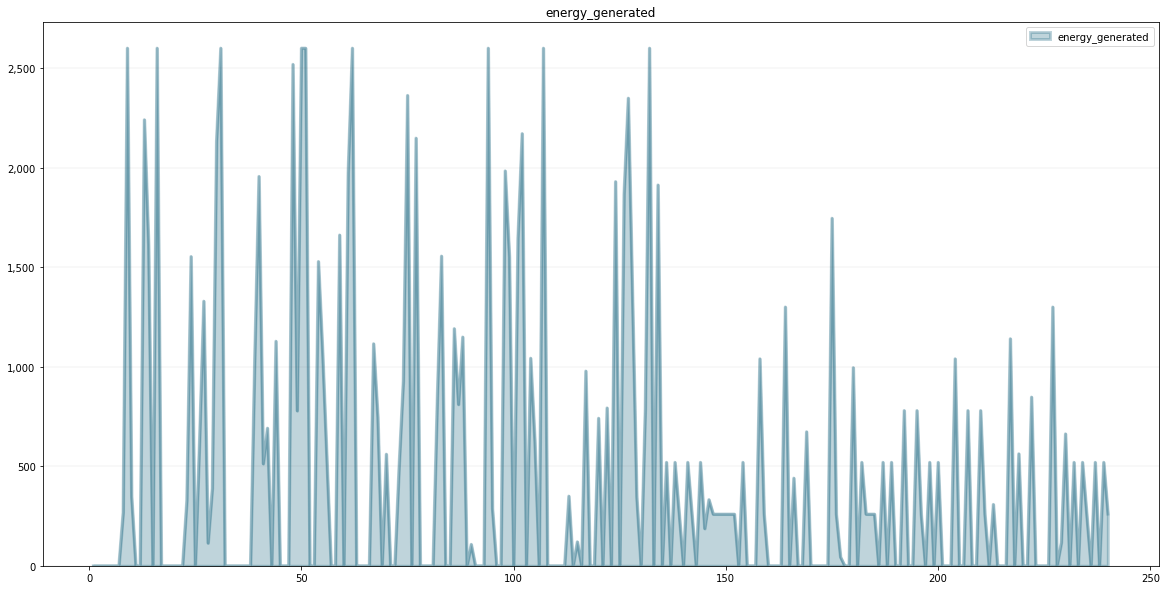

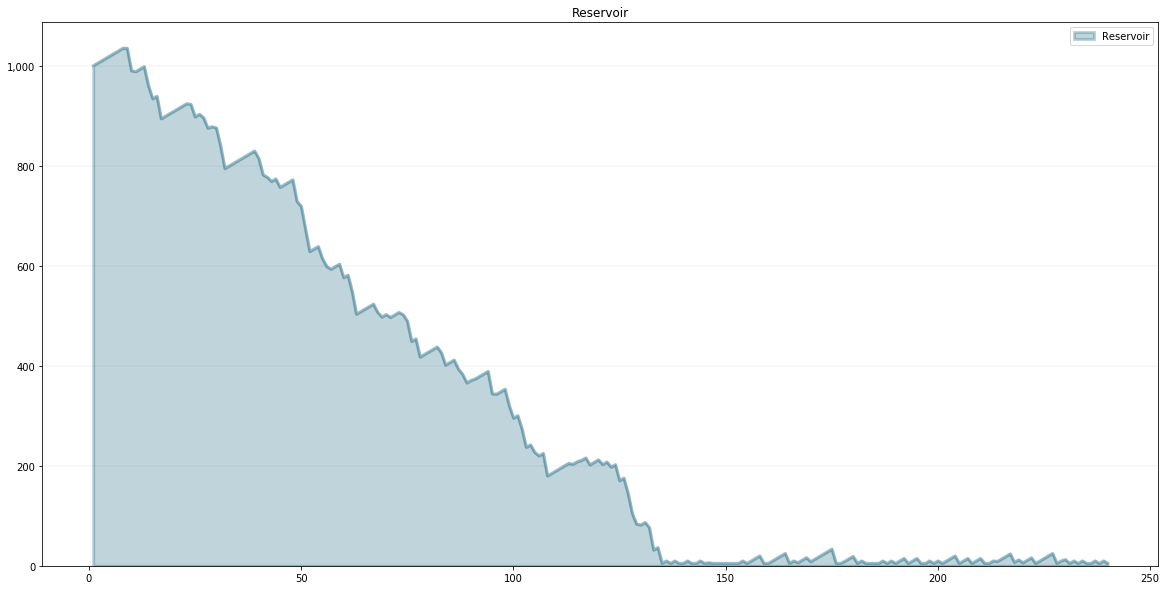

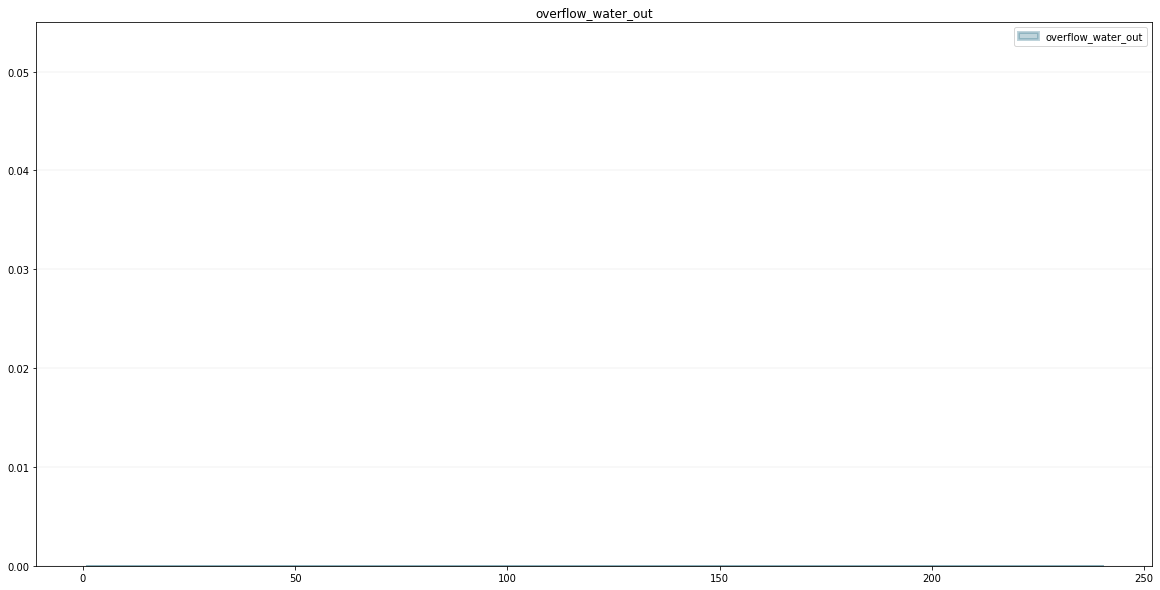

In [33]:
timeperiod = 240

model = Model(starttime=1,stoptime=timeperiod,dt=1,name='Dam')

#STOCKS

reservoir = model.stock("Reservoir")
reservoir.initial_value = 1000.0

#CONVERTERS

#hourly energy demand
demandflow = model.converter('energy_demand_in_terms_of_flow')
mean = 0
stdev = 2000
powerpercubicflow = 52
demandflow.equation = sd.min(5000, sd.max(0, sd.normal(mean, stdev))) / powerpercubicflow

#excess water
overcapacity = model.converter('reservoir_over_capacity')
overcapacity.equation = sd.max(0, reservoir - 2500)

#FLOWS

#flow into reservoir
riverin = model.flow("river_in")
riverin.equation = 5

#flow through generator
generatorflow = model.flow("flow_through_generator")
generatorflow.equation = sd.min(50, sd.min(reservoir, demandflow))

#excess water flow out
overflow = model.flow('overflow_water_out')
overflow.equation = sd.max(0, overcapacity)

reservoir.equation = riverin - generatorflow - overflow

energygenerated = model.converter('energy_generated')
energygenerated.equation = generatorflow * powerpercubicflow


energygenerated.plot()

reservoir.plot()

overflow.plot()


Consider now that the Sturgis Dam is part of a much larger energy supply chain for the city of Sturgis. Sturgis is also able to purchase energy from a nearby nuclear energy plant for a fixed amount each year. Their contract with the nuclear plant allows Sturgis to have 10,000 kilowatts hour for the entire year. Regardless of their use of this electricity, the city still pays the same amount. At the same time, the electricity always flows to the city at a rate of 10,000 kilowatts hour. If the energy is not used, it has nowhere to be stored and will be grounded (wasted).

After looking at energy demand for the city of Sturgis, you realize that the hourly demand for energy in the city is 10,000 kilowatts with a standard deviation of 2,000 kilowatts. Demand is higher during the day and lower at night. Thinking about this, you realize that the city allocates the first 10,000 kilowatts hour of energy to be pulled from the nuclear plant and uses the Sturgis Dam to generate whatever energy needs are leftover. This is why the mean demand for the dam is assumed to be zero even though it is not possible to have negative demand.

After talking with various local officials, you also find out that anything that the dam cannot generate is purchased from a very expensive peaker plant nearby. A peaker plant is a power plant used for peak demand times. It is typically fuelled by natural gas or oil and is quickly able to scale for energy production.

<b>Part 3</b>

How could you include the Nuclear energy plant into your model?

select one of the option below:

- Update your demand variable to capture the true mean and standard deviation of the energy demanded in Sturgis

- Add a variable called "Nuclear Energy Generation Rate" to your model and connect it to the variable that determines the amount of energy to generate with the dam

- Adjust the amount of energy needed from the dam to include only demand values that exceed the "Nuclear Energy Generation Rate"

- None of the above

Explanation

The first three options are correct. We need to first update the demand to capture the electricity demand of the Sturgis city. Remember that in the previous parts, we had only modeled electricity demand for the dam. Secondly, we need to model the electricity required to be generated from the dam. The initial 10,000kW is provided by the nuclear power plant and anything after it will be the electricity demand for the dam. This can be modeled by adding "Nuclear Energy Generation Rate" to the variable that determines the amount of energy to generate with the dam and by adjusting the amount of energy needed from the dam to include only the demand that exceeds the "Nuclear Energy Generation Rate".

<h2>Graded Assignment 1</h2>

SCUDS (Sudden Completely Unexpected Death Syndrome) is a new disease sweeping across the land of Oz. The first report of the disease has just been reported in Munchkin county. While the disease is very contagious, some residents in Oz have a natural immunity. After forcing all Munchkins to take a blood test, the county doctor has determined that no Munchkins have this immunity. While the disease can be detected early, it may take years or decades to actually affect an individual.

The county commissioner is looking at taking steps to mitigate the spread of SCUDS in the Munchkin population. He has been working with some system dynamics experts to create the following model.

<img src = 'w2ga11.png'>

Here are some notes that the team made:

Contact frequency is the number of times that a Munchkin makes a contact with other Munchkins. Since Munchkins are very social, this is assumed to be a constant 30 per day.

The total population of Munchkin County is 350 Munchkins.

Only one Munchkin currently has SCUDS.

All munchkins are susceptible to the disease. Once they get it, they are no longer susceptible to the disease because they are actually infected.

Out of 1000 contacts between infected and uninfected Munchkins, 3 new Munchkins are expected to contract SCUDS.

<b>Part 2</b>

Consider the system as it currently stands. Assume that no Munchkins die or are born.

What do you expect will happen to the system in the long run?

select all the correct options below:

- Contact Frequency will decrease 
- The probability of contact with an infected Munchkin will be 100% --> correct (see simulation below)
- Susceptible contacts will be 0 --> correct (see simulation below)
- 50% of the Munckins will be infected
- Contacts between infected and uninfected Munchkins will be 0 --> correct (see simulation below)
- None of the above

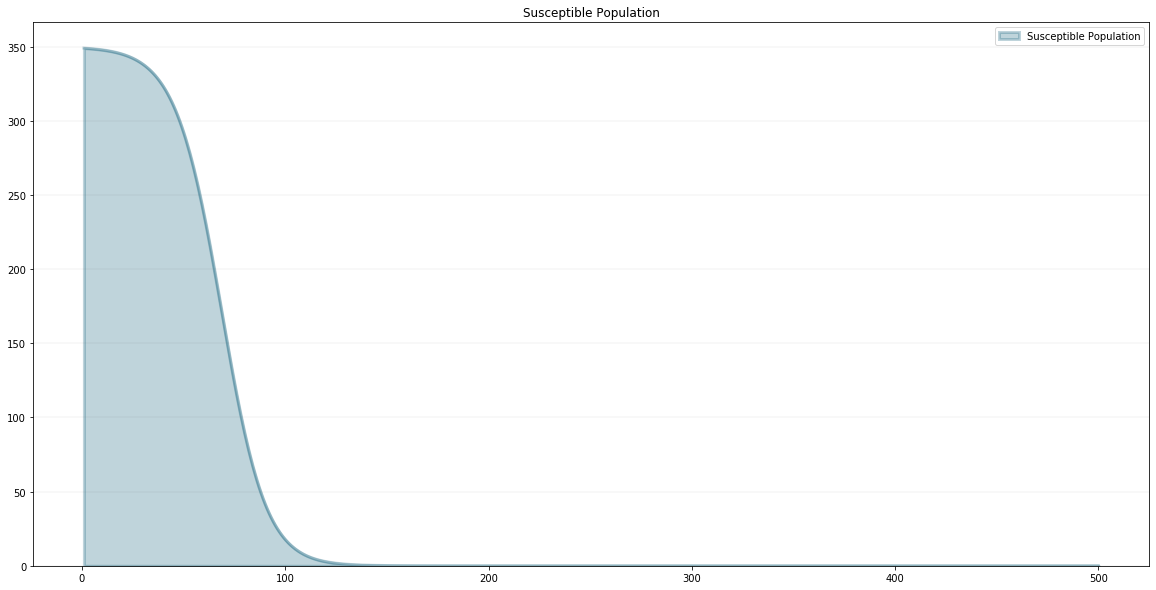

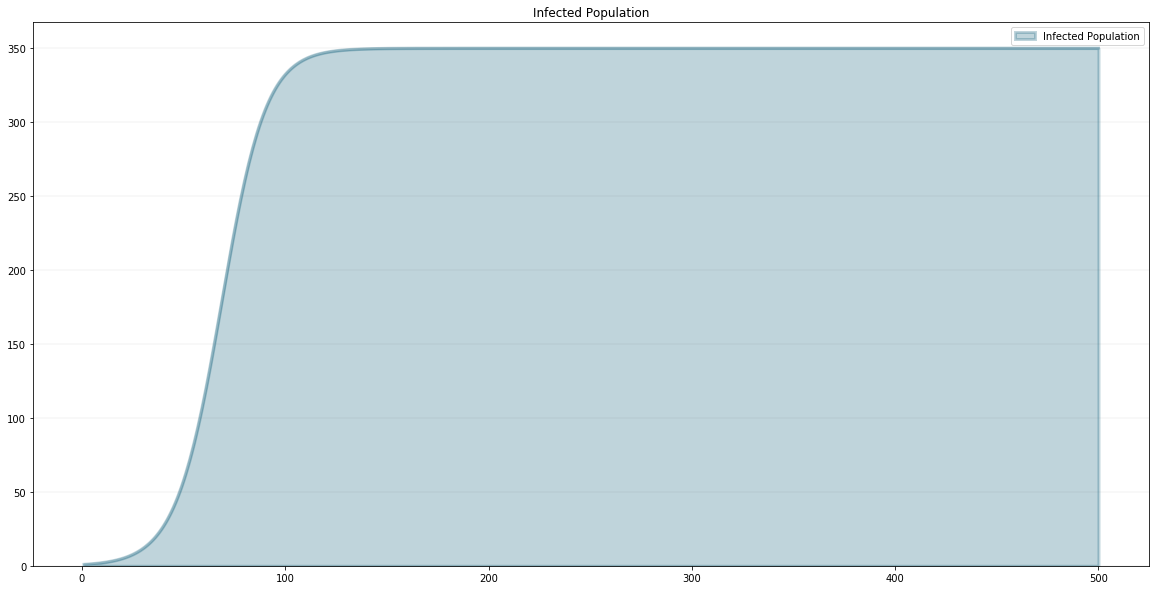

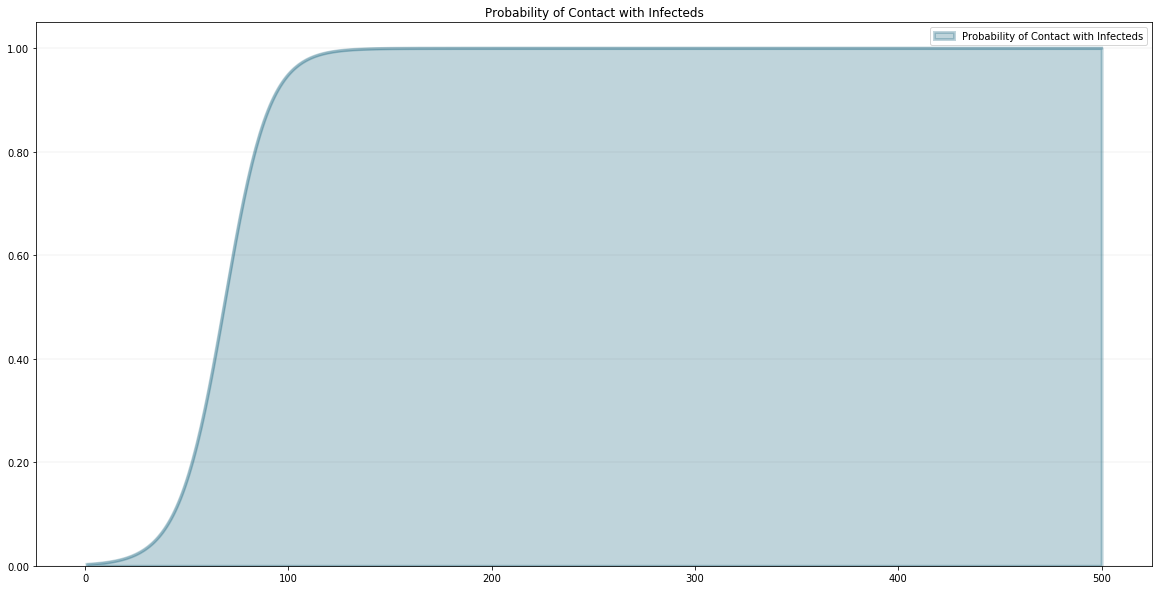

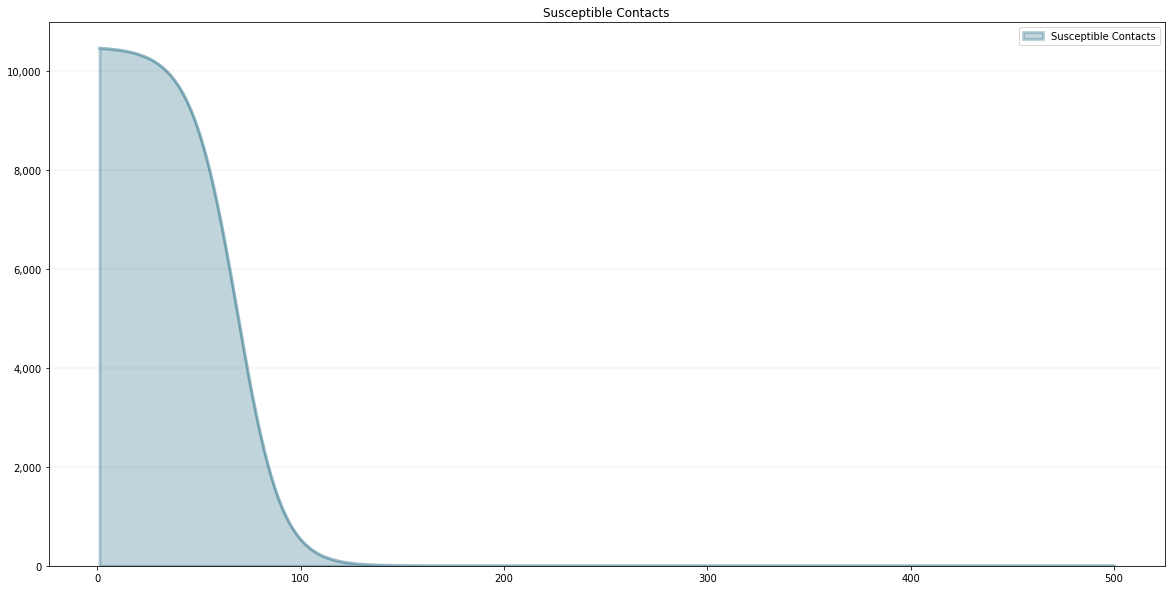

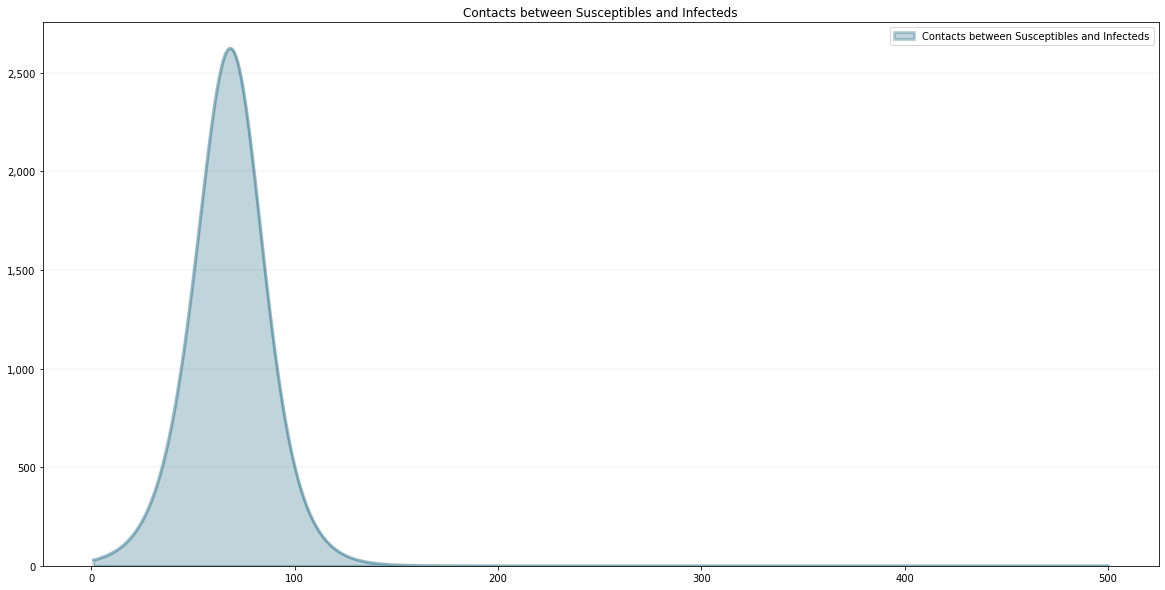

In [18]:
timeperiod = 500

model = Model(starttime=1,stoptime=timeperiod,dt=1,name='SCUDS')

#STOCKS

susceptibles = model.stock("Susceptible Population")
susceptibles.initial_value = 349.0

infecteds = model.stock('Infected Population')
infecteds.initial_value = 1.0

#CONVERTERS

#total population
totalpop = model.constant('Total Population')
totalpop.equation = 350.0

#total population
contactfreq = model.constant('Contact Frequency')
contactfreq.equation = 30.0

#infectivity
infectivity = model.constant('Infectivity')
infectivity.equation = 0.003

#susceptiblecontacts
susceptiblecontacts = model.converter('Susceptible Contacts')
susceptiblecontacts.equation = contactfreq * susceptibles

#probability of contact with infecteds
probinfectedcontacts = model.converter('Probability of Contact with Infecteds')
probinfectedcontacts.equation = infecteds / totalpop

#contacts between susceptibles and infecteds
contact_sus_inf = model.converter('Contacts between Susceptibles and Infecteds')
contact_sus_inf.equation = susceptiblecontacts * probinfectedcontacts

#FLOWS

#Infection Rate
infectionrate = model.flow("Infection Rate")
infectionrate.equation = contact_sus_inf * infectivity

susceptibles.equation = - infectionrate
infecteds.equation = infectionrate

susceptibles.plot()
infecteds.plot()
probinfectedcontacts.plot()
susceptiblecontacts.plot()
contact_sus_inf.plot()

<h2>Graded Assignment 2</h2>

InstaObjekt Inc. is involved in the assembly and sale of 3D printers. 3D printing, or additive manufacturing, is a process of making three dimensional solid objects from a digital file. The creation of a 3D printed object is achieved using additive processes. In an additive process, an object is created by laying down successive layers of material until the object is created.

You have recently joined InstaObjekt Inc in the Supply Chain Strategist role. Overall your company is doing quite well, but you often go through periods of low capacity utilization followed by a production ramp up and added shifts.  While all of this is normally blamed on market demand and the condition of the economy, you have your doubts.  Looking back at sales and production over the last few years you observe that the sales are more stable than production.  Vice President of Supply Chain Department has tasked you to determine why this might be, and what you can do about it.

You will build and simulate a simple system dynamics model to capture the current state of affairs. Your interviews and discussions with the manufacturing and human resource department have lead to the following basic model. For now, you can focus on the main loop and not on the smaller details. We will walk you through more details in the later parts. The terms used in this model are defined below:

<img src = 'w2ga21.png'>

- Sales and Production represent the rate at which 3D printers are sold and produced weekly.

- Target Inventory is the amount of stock that should be held based on expectations about sales.

- Inventory Correction is the correction for a deviation of Inventory from its target, calculated on weekly basis. 

- Time to Correct Inventory represents the time(in weeks) required to notice significant changes in inventory and schedule corrections in production.

- Target Production is the production rate required to build enough products to meet the target inventory requirement weekly.

- Target Workforce is the number of people you need to produce the amount you want to produce. 

- Time to Adjust Workforce represents the time(in weeks) required for management to agree on a change in the workforce level and screen potential applicants or notify workers to be laid off. 

Next, you will use the above information to build a simulation model. Below is some of the information you have collected from the production and sales department:

- Starting inventory is 3000 units

- Sales are initially constant and remains at 1000 units/week

- Starting workforce is 100 personnel

- Each person can assemble 10 units/week i.e. productivity is 10.

- Target inventory is equivalent to  3 times the sales in that week

- Time to adjust workforce is 3 weeks

- Time to adjust inventory is 2 weeks

The below information will help you in simulating the model. 

Target production at any week is given by the sum of sales and inventory correction in that week

"Net hire rate" depends on target workforce, workforce and time to adjust workforce. The formula for "net hire rate" is similar to " inventory correction"

NOTE: The  equation for "inventory correction" and the "Net hire rate" models the delay. Do not add any manual delay by jumping back more than 1 cell (1 week) in the past.

<b>Part 2a</b>

Assuming that the sales remains constant and the system starts from a stable state, what can you say about the inventory level over time? 

Select the shape of the inventory level that best captures this phenomena. Note:You dont have to perform any simulation to answer this question. The graphs are not drawn to scale and the x-axis is the time.

<b>Part 2b</b>

Simulate the model for 10 weeks.

What is the net hire rate at 10th week?

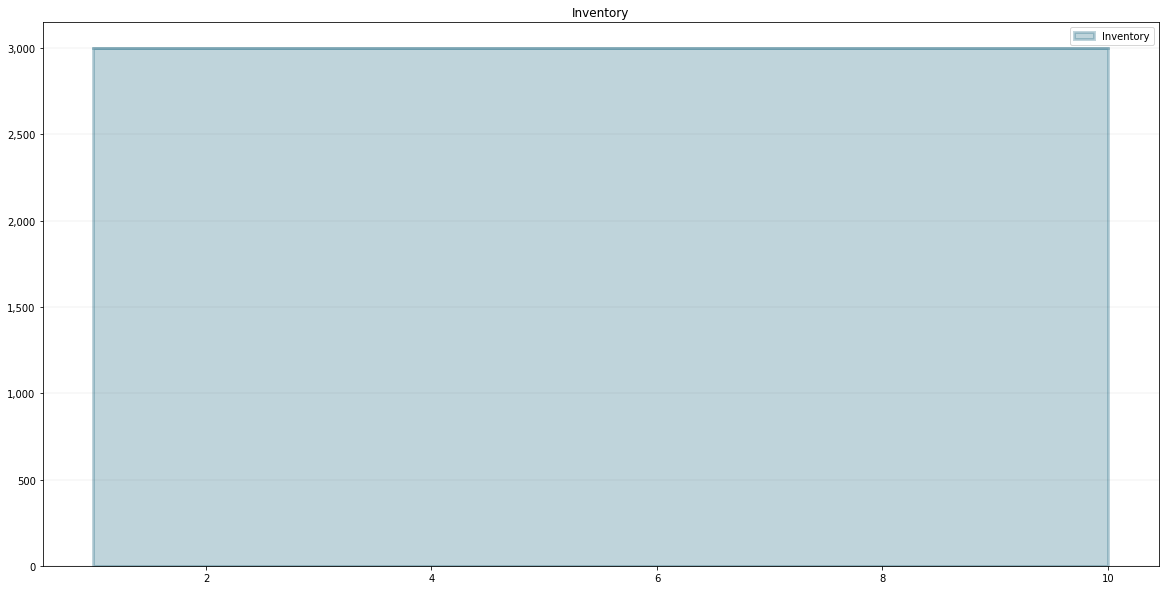

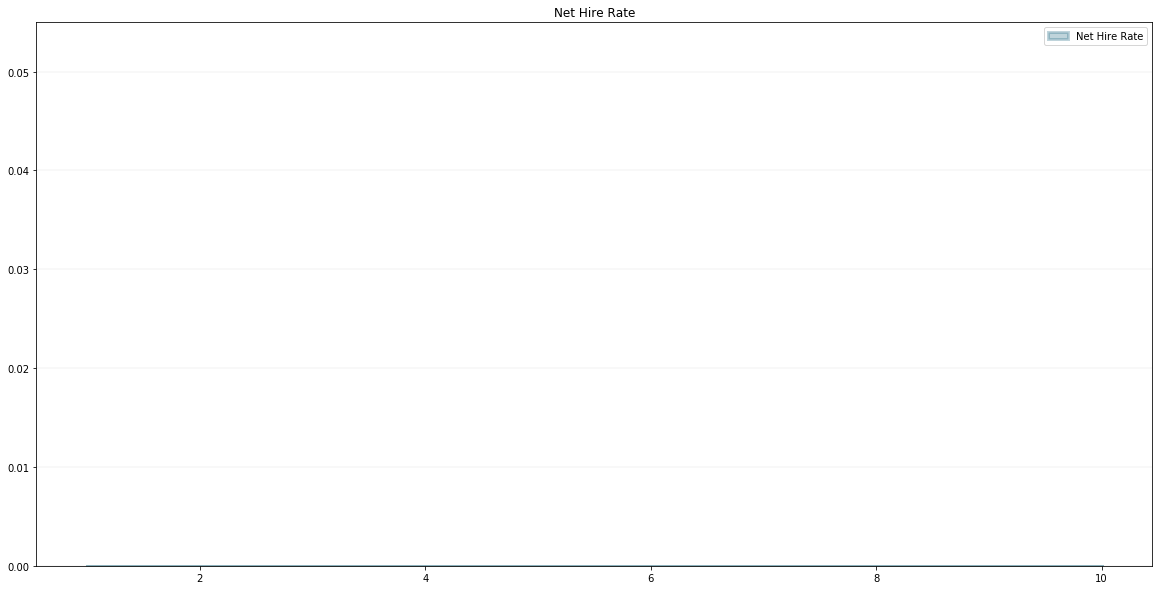

In [37]:
timeperiod = 10

model = Model(starttime=1,stoptime=timeperiod,dt=1,name='InstaObjekt')

#STOCKS

inventory = model.stock("Inventory")
inventory.initial_value = 3000.0

workforce = model.stock('Workforce')
workforce.initial_value = 100.0

#FLOWS 

#Sales
sales = model.flow("Sales")
sales.equation = 1000.0

#CONVERTERS

#productivity
productivity = model.constant('Productivity')
productivity.equation = 10.0

#time to adjust inventory
invadjtime = model.constant('Time to Adjust Inventory')
invadjtime.equation = 2.0

#time to adjust workforce
wfadjtime = model.constant('Time to Adjust Workforce')
wfadjtime.equation = 3.0

#target inventory
targetinv = model.converter('Target Inventory')
targetinv.equation = sales * 3.0

#inventory correction
invcorrection = model.converter('Inventory Correction')
invcorrection.equation = (targetinv - inventory) / invadjtime

#target production
targetprod = model.converter('Target Production')
targetprod.equation = sales + invcorrection

#target workforce
targetwf = model.converter('Target Workforce')
targetwf.equation = targetprod / productivity

#FLOWS

#Production
production = model.flow('Production')
production.equation = workforce * productivity

#FLOWS MODELLED USING CONVERTER (BPTK does not allow negative FLOW)

#Net Hire Rate
nethirerate = model.converter('Net Hire Rate')
nethirerate.equation = (targetwf - workforce) / wfadjtime

inventory.equation = production - sales
workforce.equation = nethirerate

inventory.plot()
nethirerate.plot()

At the 11th week, the sales increase from 1000 units/week to 1500units/week and remain at this level till 50th week. Simulate the model for 50 weeks and answer the next three questions (Part 3, Part 4 and Part 5). 

<b>Part 3</b>

Select the range within which the maximum inventory level predicted by your model lie?

<b>Part 4</b>

This question builds on top of part 3.

How does the production rate compares with the sales over time?

<b>Part 5</b>

This question builds on top of part 3.

At which week does the difference between production and sales stabilize to a amount that is within 2% of the sales?

Max Inventory Range:  5559.7660417619245

Week Where Difference between Sales and Production is less than 2%: 

27    0.010221
35    0.012078
41    0.019687
42    0.001600
43    0.013739
48    0.014323
49    0.005029
50    0.003555
dtype: float64


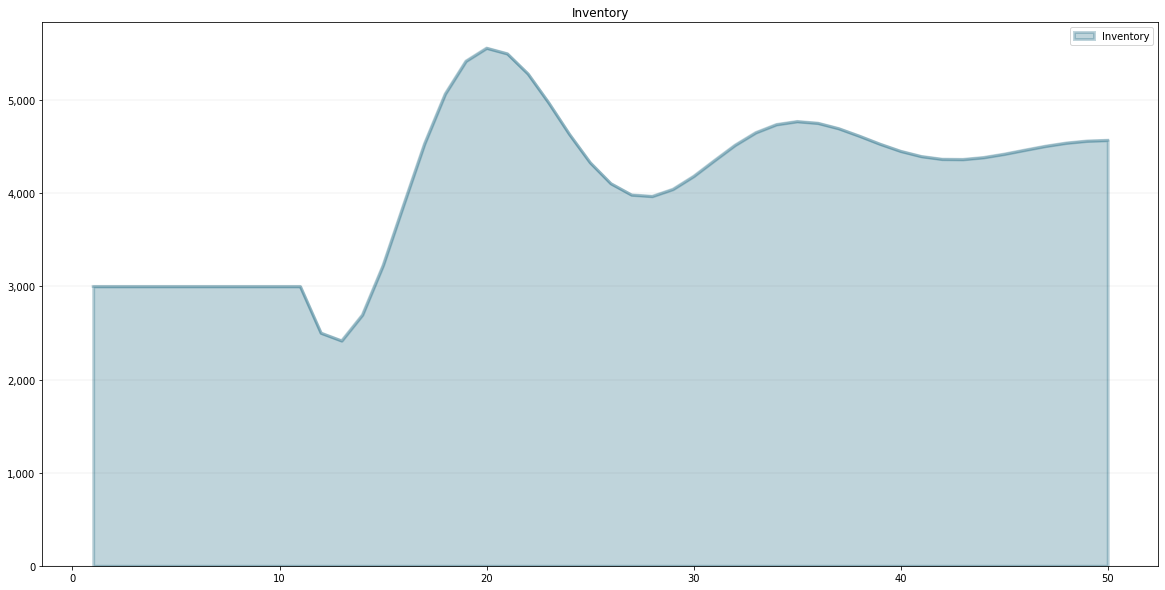

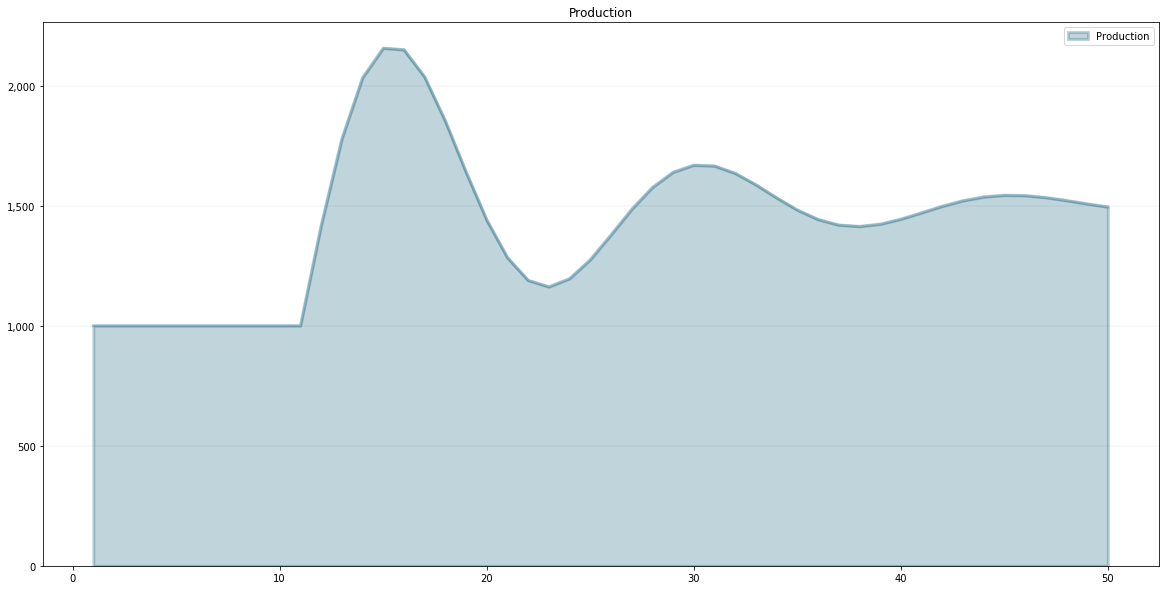

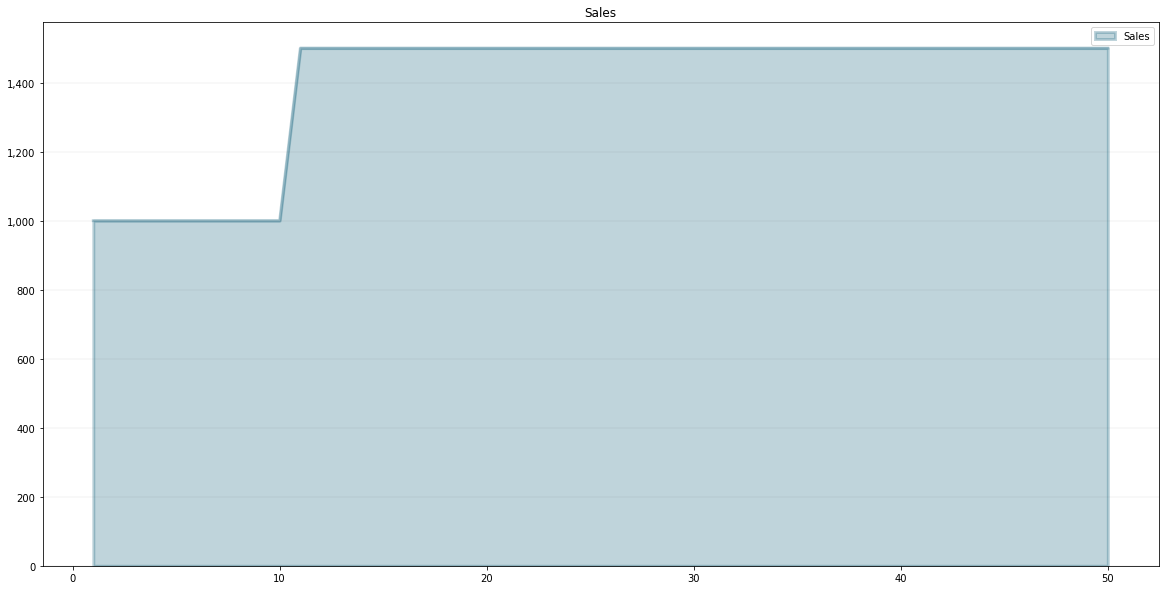

In [74]:
timeperiod = 50

model = Model(starttime=1,stoptime=timeperiod,dt=1,name='InstaObjekt')

#STOCKS

inventory = model.stock("Inventory")
inventory.initial_value = 3000.0

workforce = model.stock('Workforce')
workforce.initial_value = 100.0

#FLOWS 

#Sales
sales = model.flow("Sales")
sales.equation = sd.If(sd.time() > 10, 1500, 1000) #sales jumps to 1500/week in week 11

#CONVERTERS

#productivity
productivity = model.constant('Productivity')
productivity.equation = 10.0

#time to adjust inventory
invadjtime = model.constant('Time to Adjust Inventory')
invadjtime.equation = 2.0

#time to adjust workforce
wfadjtime = model.constant('Time to Adjust Workforce')
wfadjtime.equation = 3.0

#target inventory
targetinv = model.converter('Target Inventory')
targetinv.equation = sales * 3.0

#inventory correction
invcorrection = model.converter('Inventory Correction')
invcorrection.equation = (targetinv - inventory) / invadjtime

#target production
targetprod = model.converter('Target Production')
targetprod.equation = sales + invcorrection

#target workforce
targetwf = model.converter('Target Workforce')
targetwf.equation = targetprod / productivity

#FLOWS

#Production
production = model.flow('Production')
production.equation = workforce * productivity

#FLOWS MODELLED USING CONVERTER (BPTK does not allow negative FLOW)

#Net Hire Rate
nethirerate = model.converter('Net Hire Rate')
nethirerate.equation = (targetwf - workforce) / wfadjtime

inventory.equation = production - sales
workforce.equation = nethirerate

inventory.plot()
production.plot()
#targetwf.plot()
sales.plot()

inventorydata = np.array([inventory(a) for a in range(timeperiod+1)])
productiondata = np.array([production(a) for a in range(timeperiod+1)])
salesdata = np.array([sales(a) for a in range(timeperiod+1)])

prodsalesdiffpct = abs((productiondata - salesdata))/salesdata

prodsalesdf = pd.Series(prodsalesdiffpct)

print('Max Inventory Range: ', max(inventorydata))

print('\nWeek Where Difference between Sales and Production is less than 2%: \n')
print(prodsalesdf[(prodsalesdf <= 0.02) & (prodsalesdf > 0)])

<h2>MMPP2 - Manufacturing process</h2>

Now consider the following stock and flow representation of the same manufacturing process* and answer the corresponding questions below.

<img src = 'w2mm21.png'>

If initial finished goods inventory (FGI) is 100, production completion rate and shipment rate are both 100 units per hour, and then the production completion rate increases by 10%, and the shipment rate increases by 15%, what will be the net effect on finished goods inventory (FGI)?


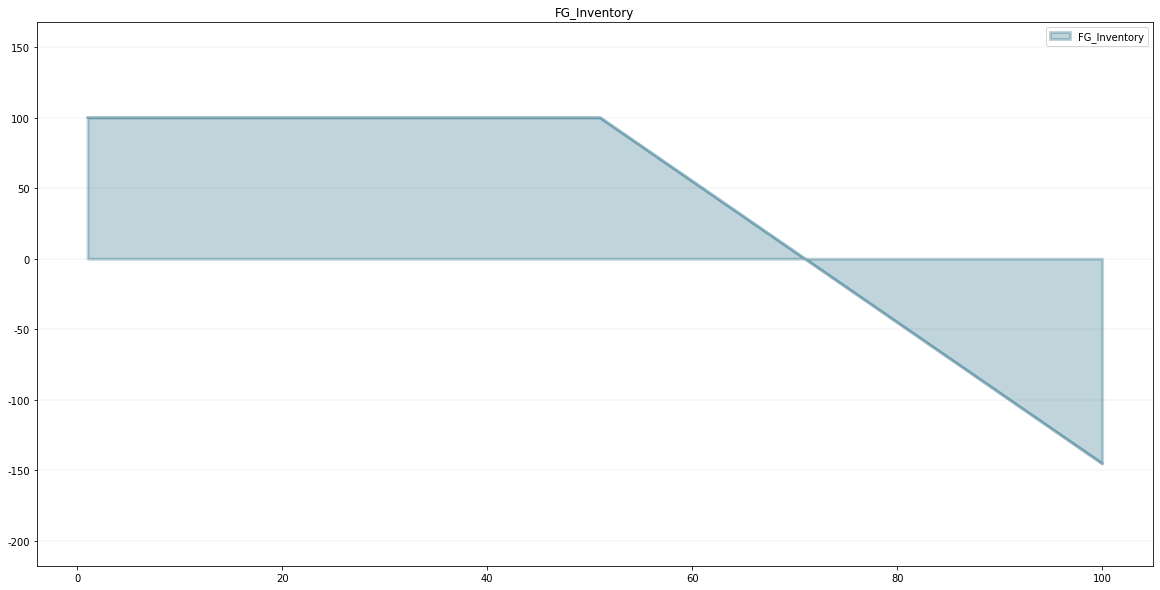

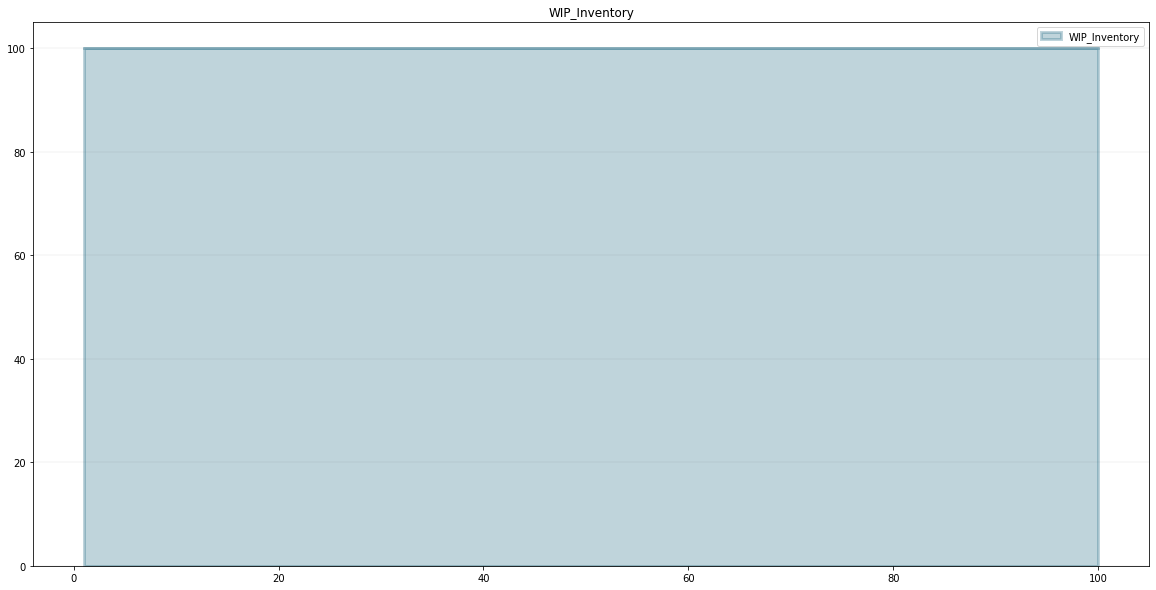

In [42]:
timeperiod = 100

model = Model(starttime=1,stoptime=timeperiod,dt=1,name='Manufacturing Process')

#STOCKS

wip = model.stock("WIP_Inventory")
wip.initial_value = 100.0

fg = model.stock('FG_Inventory')
fg.initial_value = 100.0

#FLOWS 

#Production Completion Rate
prodcomprate = model.flow("Prod_Completion_Rate")
prodcomprate.equation = sd.If(sd.time() > 50, 100*1.1, 100)

#Shipment Rate
shiprate = model.flow("Shipment_Rate")
shiprate.equation = sd.If(sd.time() > 50, 100*1.15, 100)

#Initial Production Rate
inprodrate = model.flow("Initial_Completion_Rate")
inprodrate.equation = sd.If(sd.time() > 50, 100*1.1, 100)

wip.equation = inprodrate - prodcomprate
fg.equation =  prodcomprate - shiprate

fg.plot()
wip.plot()



<h2>MMPP4: FlashClothing</h2>

FlashClothing is a specialty apparel and clothing manufacturer based out of New York, USA. Their flagship product is a color changing T-shirt that will be sold by the brand name, FlashTshirt.  FlashTshirt offers true color changing capability controllable by a smartphone. 

FlashTshirt uses a membrane of tiny crystals that react when exposed to a subtle amount of current.  As the current passes through the membrane, a charge is created that causes the crystals to change their formation, affecting the fabric’s color and outward appearance. This process takes a few minutes to complete and is controlled by a smartphone. 

FlashClothing is planning to launch their shirt in the US in a few months time and is currently working to set up the logistics and supply chain of the shirt.

You have been engaged by FlashCothing to provide them guidance on the adoption and growth pattern of FlashTshirt. The growth pattern can help FlashClothing to estimate the peak demand and can thus help them set up an appropriate logistic and supply chain system.

From your previous experience in handling similar projects, you know that the adoption of new products happens both through Direct Advertisement as well as Word of Mouth. You also know that system dynamics is a great tool to model such systems. 

You create the following below basic model and then meet the FlashClothing Marketing and Sales team to get additional information.

<img src = 'w2mm31.png'>

Through interviews with various members, you have gathered the below information. 

1. FlashClothing estimates total potential adopters to be 50 Million.

2. The marketing team estimates that direct advertisement will convert 1% of potential adopters to adopters every month. 

3. Adoption from word of mouth is dependent on total population(N), contact rate(C), adoption fraction(F), potential adopters(P) and adopters(A). 

-Contact rate(C) defines the rate at which potential customers come in contact with existing customers. This rate is estimated to be 40 contacts/month.

-A fraction(F) of these contacts result in the adoption of the FlashTshirt. This fraction is estimated to be 4% or 0.04.

-Increasing the total population size will make it difficult for an existing customer to meet a potential customer and will thus reduce the adoption rate. The total population size of US is 300M. 

4. The total adoption rate is the sum of the adoption due to advertisement and adoption due to word of mouth. 

You will use the model and the information you have gathered from the interviews to model the growth and the adoption of FlashTshirt. 

<b>Part 2</b>

Simulate the model in either vensim or excel. Assume that there are no adopters when you start the model and use time scale of 36 months.

Plot the "Adopters" versus "time".

<b>Part 3</b>

What is the maximum amount of units (in million) that gets sold in a single month? Assume that each user will purchase only one shirt.

Part3.
max number of shirt sales (or in other words number of shirt bought by new adopters each month, millions):  3.586320550031065


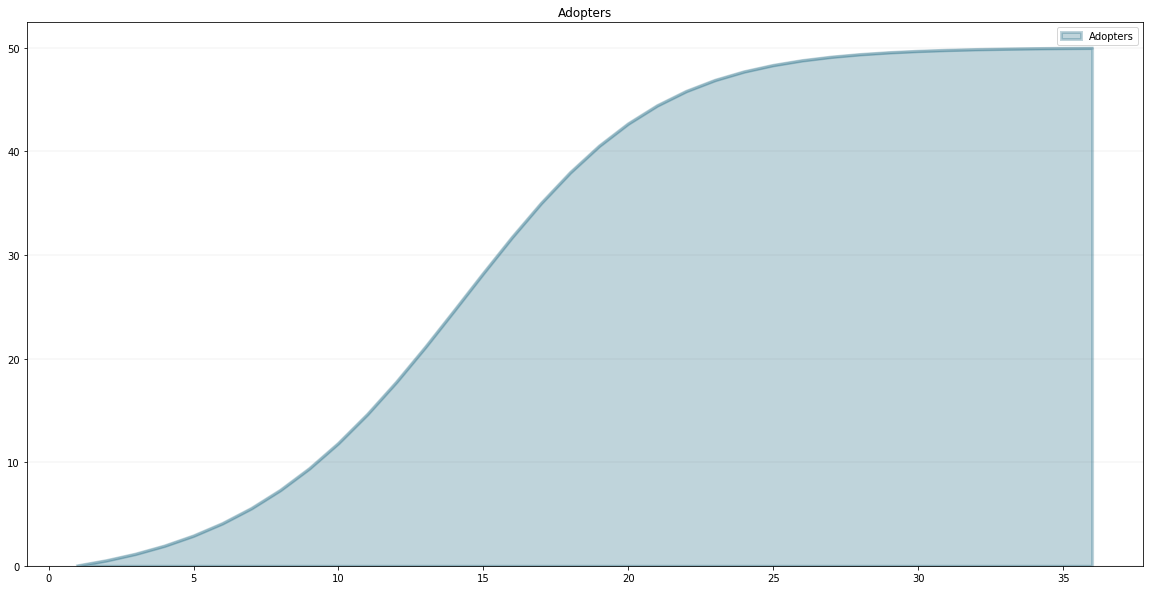

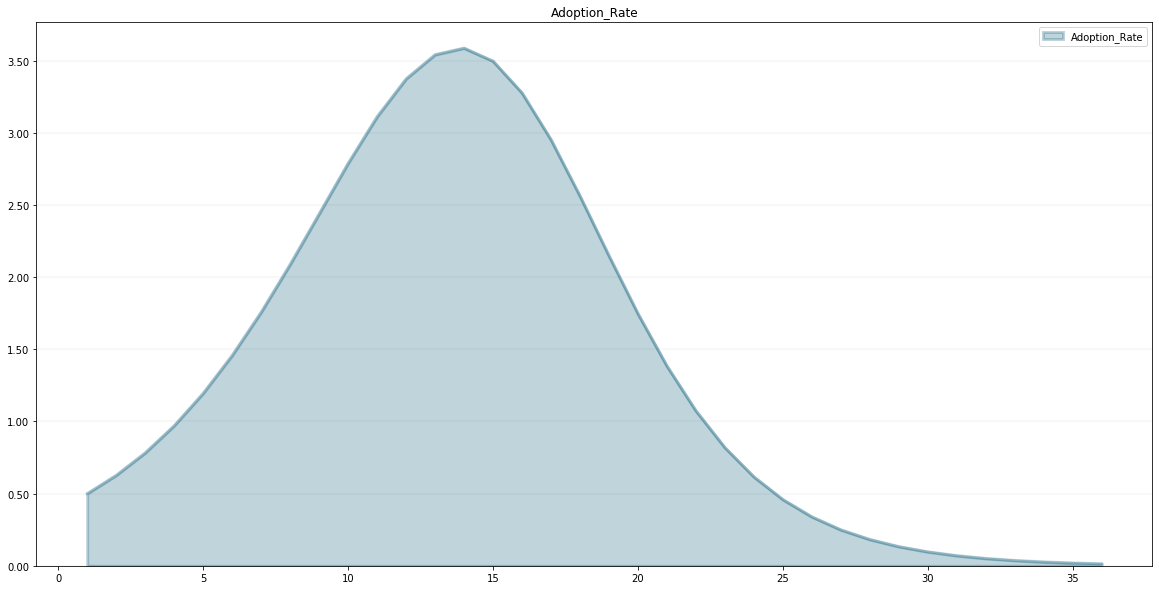

In [8]:
timeperiod = 36

model = Model(starttime=1,stoptime=timeperiod,dt=1,name='Flash Clothing')

#STOCKS

potentials = model.stock("Potential_Adopters")
potentials.initial_value = 50.0

adopters = model.stock('Adopters')
adopters.initial_value = 0.0

#CONVERTERS

#total population
totalpop = model.constant('Total Population')
totalpop.equation = 300.0

#contact rate
contactrate = model.constant('Contact Rate')
contactrate.equation = 40.0

#fraction adoption
fraction = model.constant('Fraction of Adoption from Contact')
fraction.equation = 0.04

#advertising adoption
adv_adp = model.converter('Adoption from Advertising')
adv_adp.equation = sd.max(0, 0.01*potentials)

#word of mouth adoption
wom_adp = model.converter('Adoption from Word of Mouth')
wom_adp.equation = sd.max(0, (contactrate * fraction * potentials * adopters) / totalpop)

#FLOWS 

#Adoption Rate
adprate = model.flow("Adoption_Rate")
adprate.equation = adv_adp + wom_adp

potentials.equation = -adprate
adopters.equation =  adprate

adopters.plot()
adprate.plot()

adoptionratedata = np.array([adprate(a) for a in range(timeperiod+1)])

print('Part3.\nmax number of shirt sales \
(or in other words number of shirt bought by new adopters each month, millions): ', max(adoptionratedata))

<b>Part 4</b>

The finance team has proposed to reduce the direct advertisement budget to zero and rely solely on word of mouth. Model this phenomenon and enter the number of adopters (in Million) FlashClothing will acquire after 12 months? All other parameters remains the same and we start at t=0.

Part4. Adopters at the end of 12 month period:  0.0
Without direct advertising there will be no initial adopters, hence 0 word of mouth adoption as well


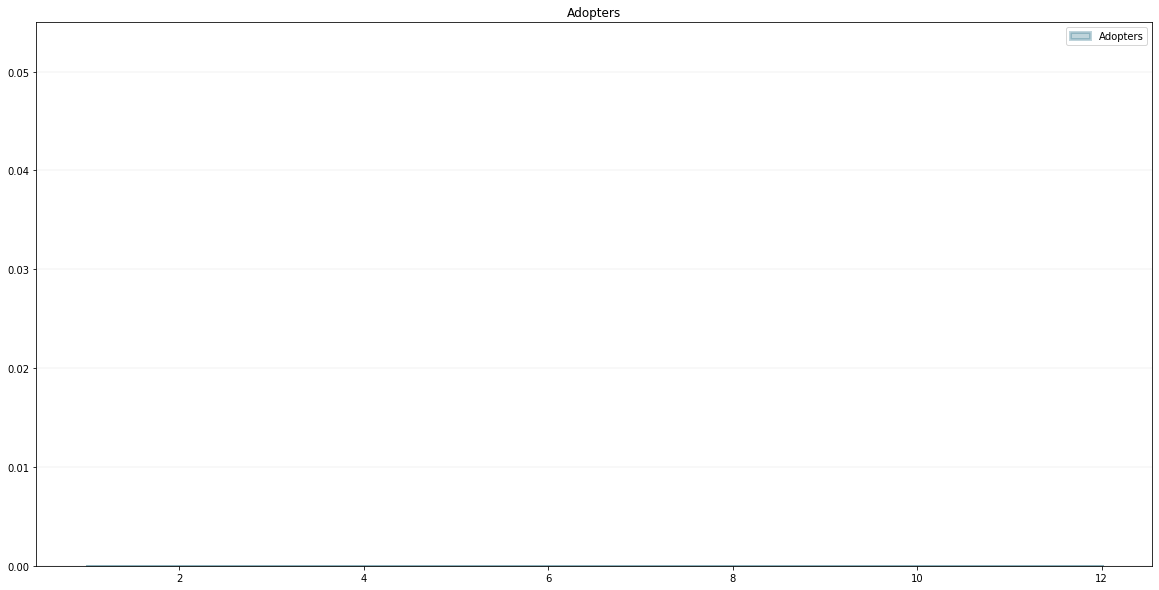

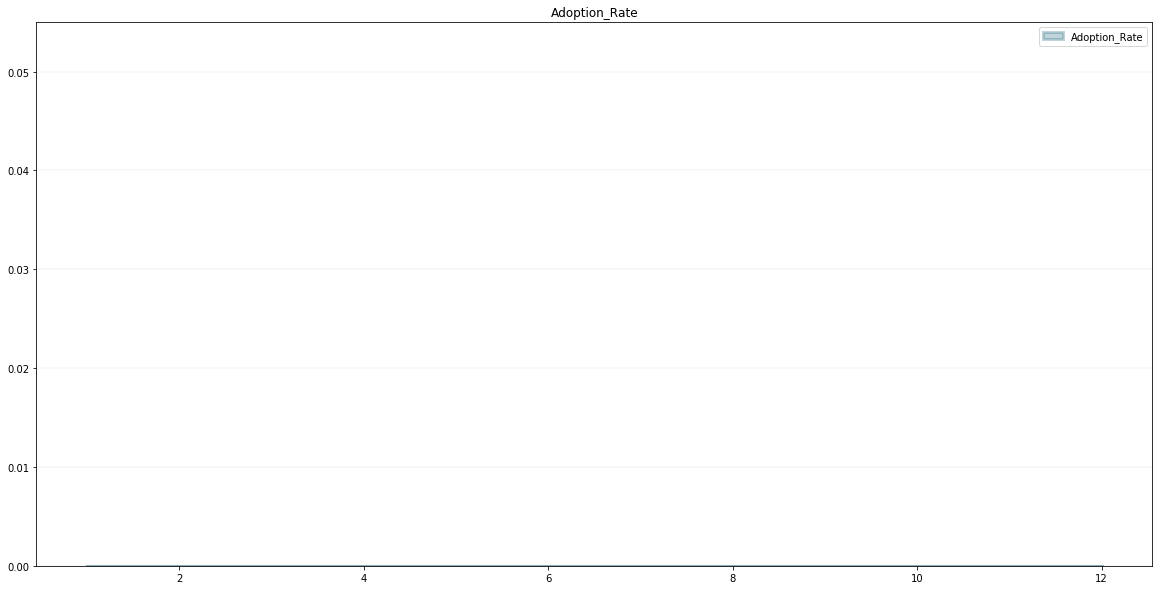

In [9]:
timeperiod = 12

model = Model(starttime=1,stoptime=timeperiod,dt=1,name='Flash Clothing')

#STOCKS

potentials = model.stock("Potential_Adopters")
potentials.initial_value = 50.0

adopters = model.stock('Adopters')
adopters.initial_value = 0.0

#CONVERTERS

#total population
totalpop = model.constant('Total Population')
totalpop.equation = 300.0

#contact rate
contactrate = model.constant('Contact Rate')
contactrate.equation = 40.0

#fraction adoption
fraction = model.constant('Fraction of Adoption from Contact')
fraction.equation = 0.04

#advertising adoption
adv_adp = model.converter('Adoption from Advertising')
adv_adp.equation = 0.0

#word of mouth adoption
wom_adp = model.converter('Adoption from Word of Mouth')
wom_adp.equation = sd.max(0, (contactrate * fraction * potentials * adopters) / totalpop)

#FLOWS 

#Adoption Rate
adprate = model.flow("Adoption_Rate")
adprate.equation = adv_adp + wom_adp

potentials.equation = -adprate
adopters.equation =  adprate

adopters.plot()
adprate.plot()

adoptersdata = np.array([adopters(a) for a in range(timeperiod+1)])

print('Part4. Adopters at the end of 12 month period: ', max(adoptersdata))
print('Without direct advertising there will be no initial adopters, hence 0 word of mouth adoption as well')

<h2> Midterm Exam Problem 2</h2>

HifyApp company, headquartered in Amsterdam, is an online subscription-based streaming service that offers copyright restricted music and podcasts from all around the world. Despite being located in Holland, it was originally focused on the American market due to its fast growth. Starting a few of years ago, HifyApp has also offered in-house content production of audiobooks with great success (additional content attracts more users to the platform), and is now considering expansion to the European market.

As the new regional manager of market development, you are now in charge of this new European market segment. Congratulations! Of course, this means you are invited to join the top management team to identify main variables impacting the company’s subscriber base as a driver of profitability. Time has come to re-design HifyApp’s overall strategy and you'll be part of it!.

You've been taking System Dynamics lectures on SC3x so after hours of fruitful discussions and several meetings, you and the team managed to build the following model.

<img src = 'midterm21.png'>

-Potential adopters: estimated number out of the existing households in the European market that could afford the current HifyApp subscription price.

-Free Users: HifyApp offers a period of full service for free to attract customers to its platform. After or during that time period, the users can drop the platform or turn into subscribers.

-Subscribers: HifyApp has different types of subscriptions (single or multiple users) but they all count as 1 customer for the strategy analysis.

<b>Part 1</b>

Not to forget about any details and assumptions, your colleague Amy Rivera created a list of important facts and figures below.

-Adoption Rate: 2% of the potential adopters a Week.

-Subscription Rate: from the last 2 years' data set, you observe a conversion rate between Free Users and Subscribers, of 45% on a weekly basis (over free users before considering dropout rates for that week) with no extra effort.

-Free Users' Dropout Rate: 30% a week. As you can see in the model arrows, users who drop out don't return to the pool of potential adopters.

-(Subscribers') Dropout Rate: the team identified that 10% of the total subscribers are dropping the subscriptions on a weekly basis. Users who drop out, don't return to the pool of potential adopters.

-Subscription Price: Average of 3 Dollars per Subscriber. Only paid by each user once, whenever the user proceeds with a subscription. Revenue for each week is then calculated based on number of new suscribers times the price for subscribing.

Clearly, there are lots of additional loops you could consider in this diagram, but you are only taking into account the variables, stocks and flows that are key for this particular strategy. For all the following questions, consider the diagram to identify the flows! If a relation between stocks and/or any variables is not stated there, you shouldn’t assume it exists to solve it.

Note: The team knows that streaming services usually charge differently their subscribers, and that the pool of potential adopters is not necessary operating as in this case study, but you are trying to keep the model simple to show your general understanding on System Dynamics. Please, do your best to focus on the provided information!

You are ready now to run your model, and to do so, Ms.Rivera informed you should initiate it with 1539224 potential adopters.

Simulating over 52 weeks, which graphs best represents your subscriber’s base over time?

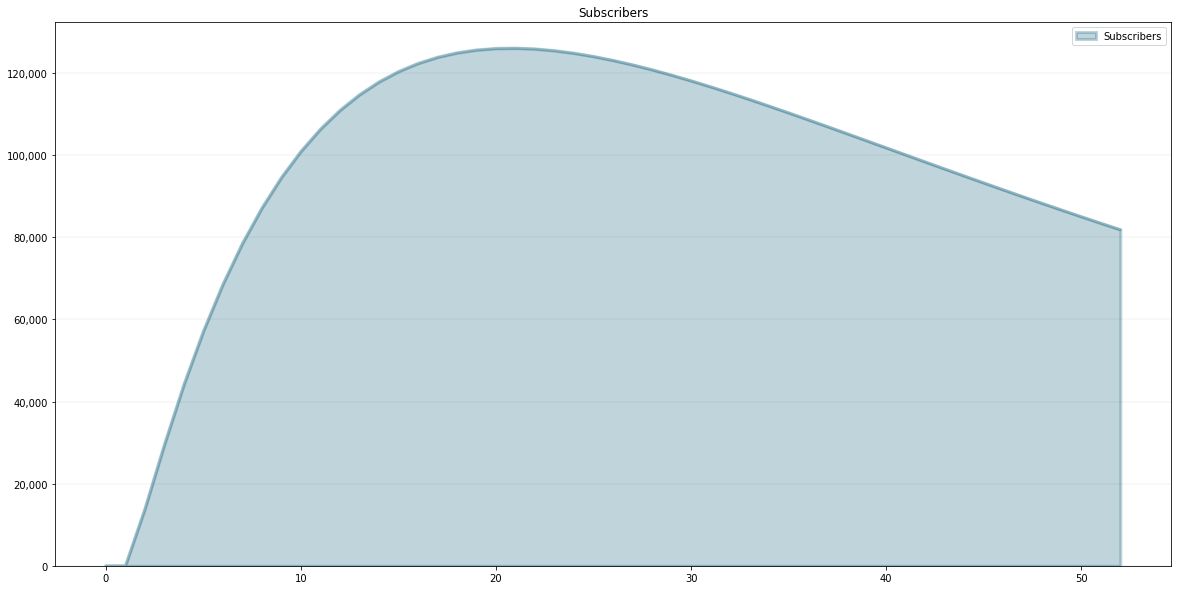

In [64]:
timeperiod = 52

model = Model(starttime=0,stoptime=timeperiod,dt=1,name='HifyApp')

#STOCKS

potentials = model.stock("Potential_Adopters")
potentials.initial_value = 1539224.0

frees = model.stock('Free_Users')
frees.initial_value = 0.0

subscribers = model.stock('Subscribers')
subscribers.initial_value = 0.0


#FLOWS

#adoption rate
adp_rate = model.flow('Adoption Rate')
adp_rate.equation = sd.max(0, 0.02*potentials)

#subscription rate
sub_rate = model.flow('Subscription Rate')
sub_rate.equation = sd.max(0, 0.45*frees)

#free users drop rate
fdrop_rate = model.flow('Free Users Drop Rate')
fdrop_rate.equation = sd.max(0, 0.3*frees)

#subscribers drop rate
sdrop_rate = model.flow('Subscribers Drop Rate')
sdrop_rate.equation = sd.max(0, 0.1*subscribers)

#CONVERTERS

#subscription price
sprice = model.constant('Subscription Price')
sprice.equation = 3.0

potentials.equation = -adp_rate
frees.equation = adp_rate - fdrop_rate - sub_rate
subscribers.equation =  sub_rate - sdrop_rate

#revenue
revenue = model.converter('Revenue from New Subscribers')
revenue.equation = sprice * sub_rate

subscribers.plot()


<b>Part 2</b>

While working in demand forecasting, your manager Mr. Ramirez identifies that the actual subscription rate between free trial users and subscribers is 25 % instead of the original defined percentage. Analyzing a longer term period of 104 weeks, what is the estimated weekly revenue in this scenario by the last week?

What is the potential adopters level by week 104?

Part2a. Revenue at week 104:  5329.0
Part2b. Potential Adopters at week 104:  188284.0


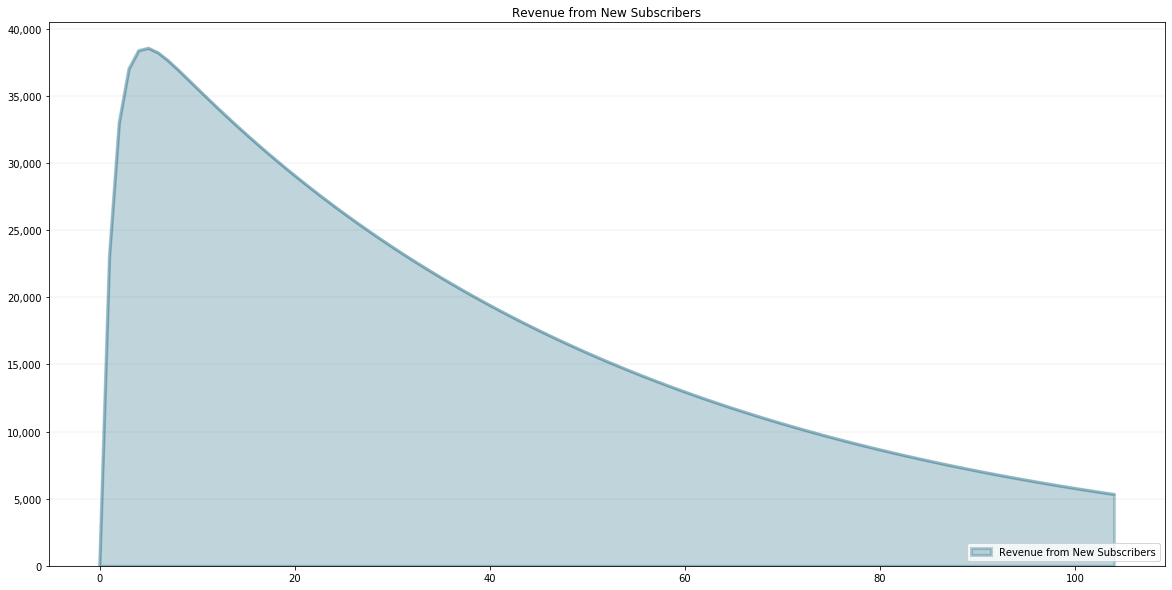

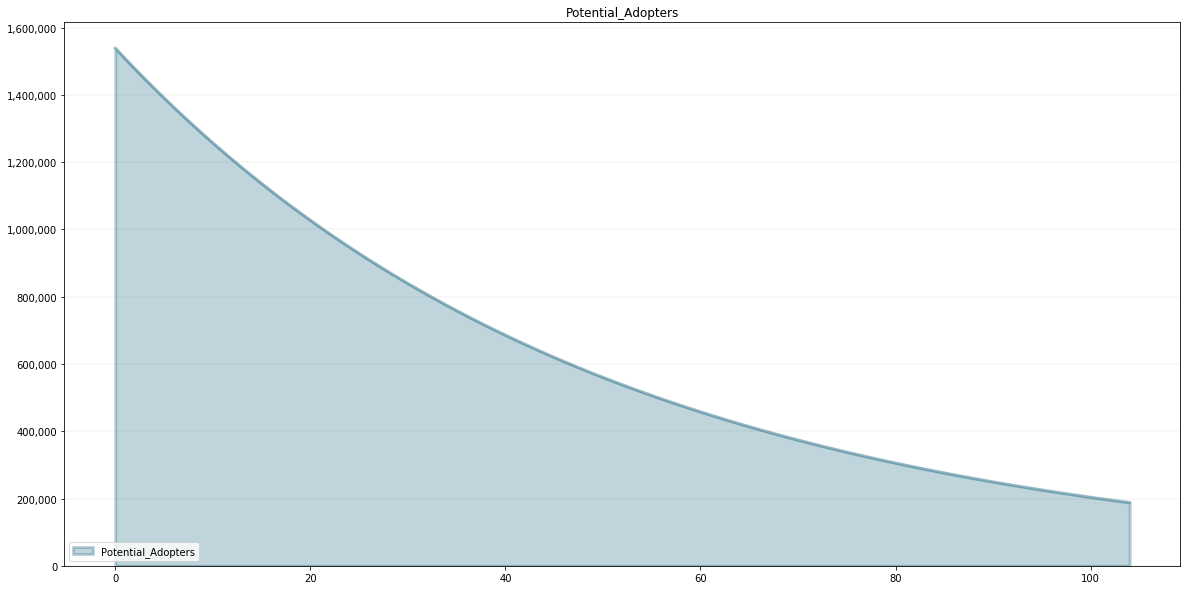

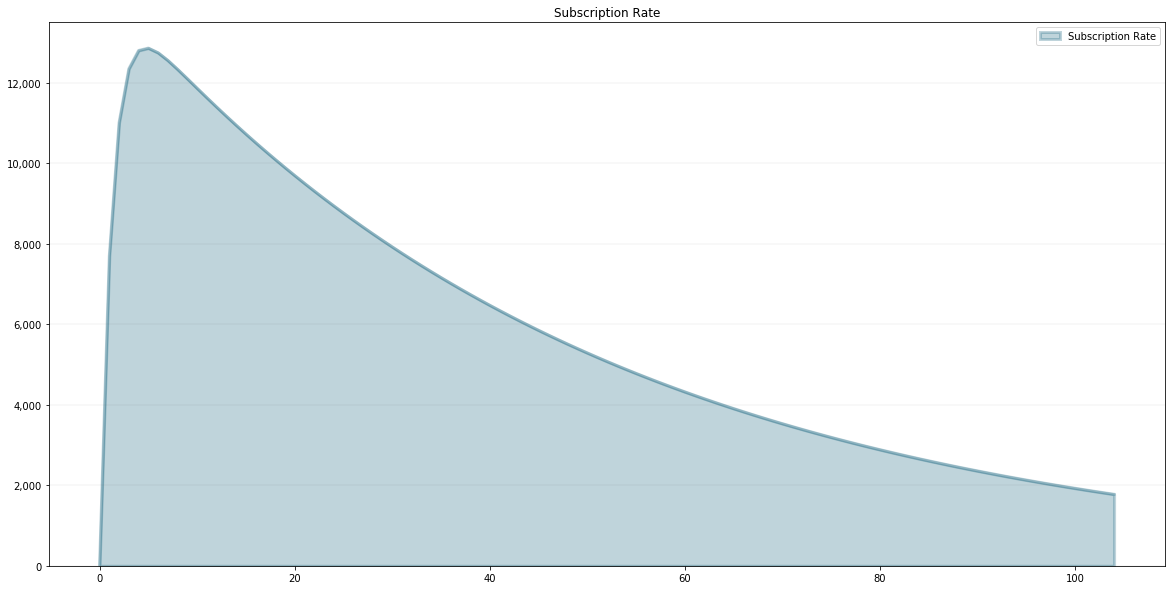

In [76]:
timeperiod = 104

model = Model(starttime=0,stoptime=timeperiod,dt=1,name='HifyApp')

#STOCKS

potentials = model.stock("Potential_Adopters")
potentials.initial_value = 1539224.0

frees = model.stock('Free_Users')
frees.initial_value = 0.0

subscribers = model.stock('Subscribers')
subscribers.initial_value = 0.0


#FLOWS

#adoption rate
adp_rate = model.flow('Adoption Rate')
adp_rate.equation = sd.max(0, 0.02*potentials)

#subscription rate
sub_rate = model.flow('Subscription Rate')
sub_rate.equation = sd.max(0, 0.25*frees)

#free users drop rate
fdrop_rate = model.flow('Free Users Drop Rate')
fdrop_rate.equation = sd.max(0, 0.3*frees)

#subscribers drop rate
sdrop_rate = model.flow('Subscribers Drop Rate')
sdrop_rate.equation = sd.max(0, 0.1*subscribers)

#CONVERTERS

#subscription price
sprice = model.constant('Subscription Price')
sprice.equation = 3.0

potentials.equation = -adp_rate
frees.equation = adp_rate - fdrop_rate - sub_rate
subscribers.equation =  sub_rate - sdrop_rate

#revenue
revenue = model.converter('Revenue from New Subscribers')
revenue.equation = sprice * sub_rate

revenue.plot()
potentials.plot()
sub_rate.plot()


#revenuedata = np.array([revenue(a) for a in range(timeperiod+1)])
#potentialsdata = np.array([potentials(a) for a in range(timeperiod+1)])

print('Part2a. Revenue at week 104: ', round(revenue(timeperiod),0))
print('Part2b. Potential Adopters at week 104: ', round(potentials(timeperiod),0))
